In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
%matplotlib inline

In [3]:
dataset = load_diabetes()

In [14]:
# print(dataset['DESCR'])
# dataset['target']

In [29]:
# X = pd.DataFrame(
#     dataset['data'],
#     columns=[
#         "age",
#         "sex",
#         "bmi",
#         "bp",
#         "s1",
#         "s2",
#         "s3",
#         "s4",
#         "s5",
#         "s6",
#     ]
# )

# y = pd.Series(dataset['target'], name='target')
    
# Now concatenate them
# dataset = pd.concat([X, y], axis=1)

# dataset.to_csv('./data/diabetes_data.csv', index=False)
# dataset

In [34]:
X = dataset.drop(columns='target')
y = dataset['target']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= 0.3,
    random_state=10
)

<Axes: >

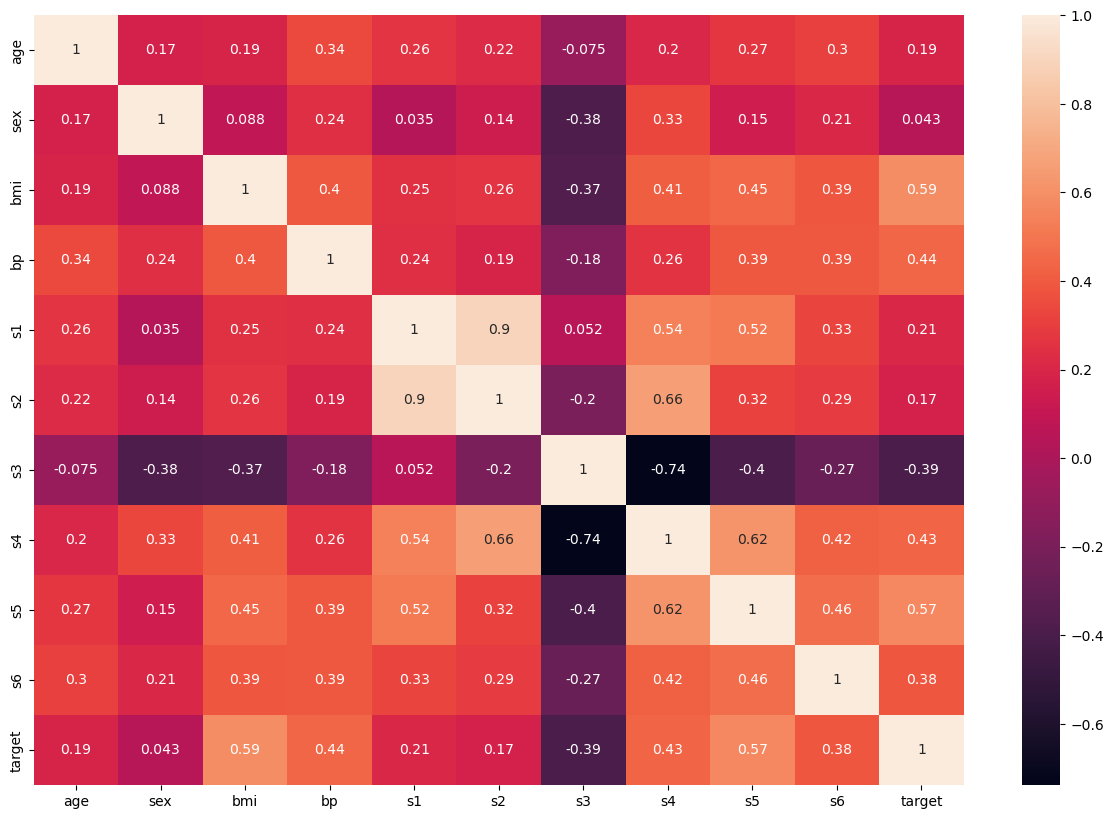

In [47]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True)
# sns.boxplot(dataset)

In [48]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
# hyperparameter tuning
params = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter": ["best", "random"],
    "max_depth": [1,2,3,4,5,10,15,20,25],
    "max_features": ["sqrt", "log2", "auto"]
}

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

grid = GridSearchCV(
    estimator= model,
    param_grid=params,
    scoring='neg_mean_squared_error',
    # cv=5
)

grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [55]:
grid.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      max_features='sqrt')

In [56]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [61]:
from sklearn.metrics import confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

y_pred = grid.predict(X_test)
print(f"mean square error: {mean_squared_error(y_test, y_pred)}")
print(f"mean absolute error: {mean_absolute_error(y_test, y_pred)}")
print(f"r2 score: {r2_score(y_test, y_pred)}")

mean square error: 3788.46992481203
mean absolute error: 46.56390977443609
r2 score: 0.4012852646865357


In [64]:
# manually implemet from best params
dt = DecisionTreeRegressor(
    criterion= 'absolute_error',
    max_depth= 3,
    max_features= 'sqrt',
    splitter= 'best'
)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      max_features='sqrt')

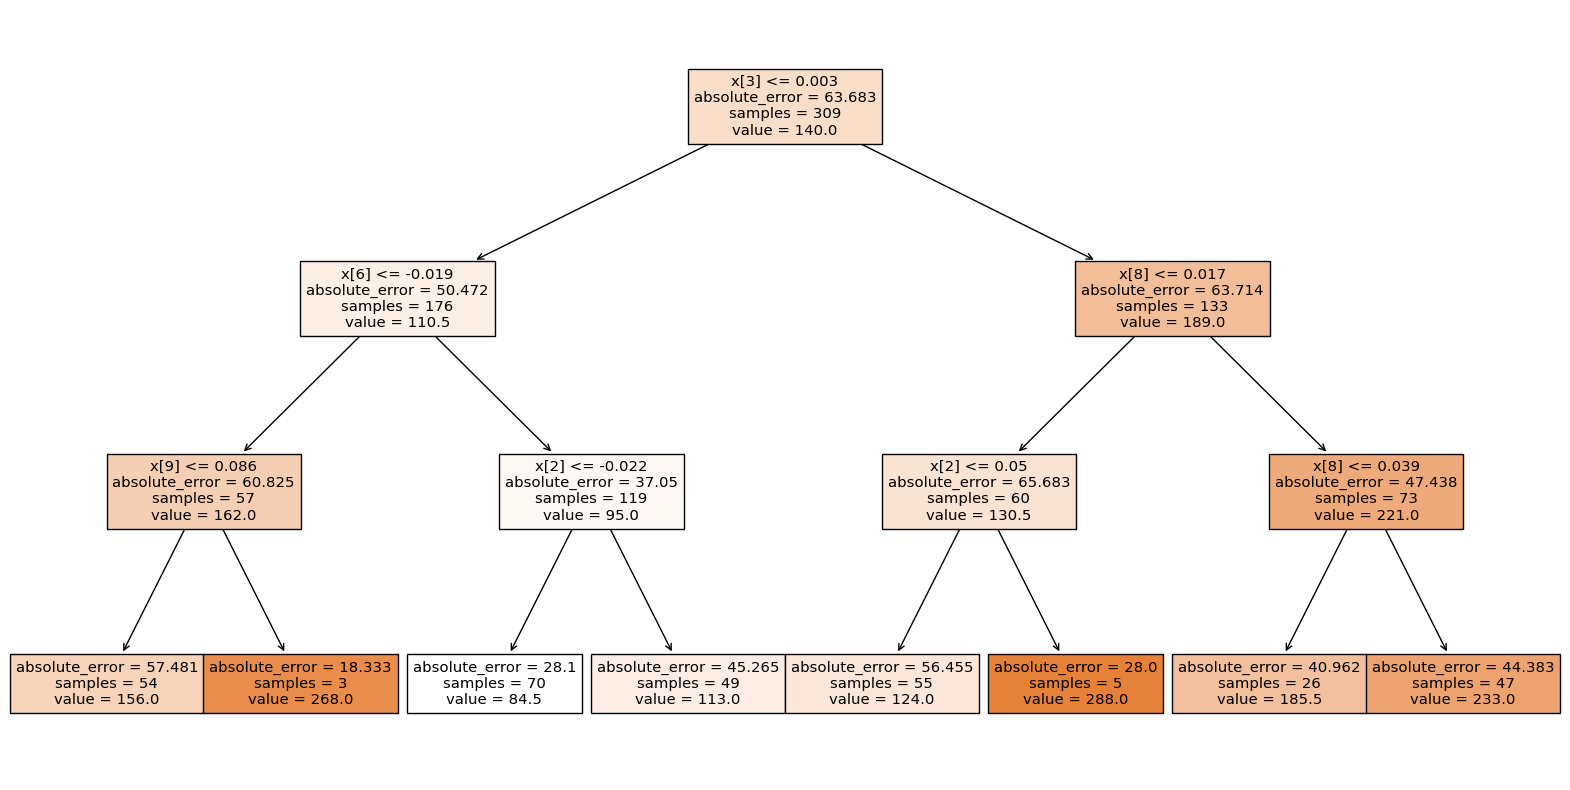

In [66]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, filled=True)
plt.show()